In [9]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

from generate_data.load_data import loader
from processor import preprocess_data

In [2]:
rating_path ="../../data/raw/ml-100k/u.data"
movie_path ="../../data/raw/ml-100k/u.item"
user_path ="../../data/raw/ml-100k/u.user"
ratings, movies, users = loader(rating_path, movie_path, user_path)
ratings, movies, users, movie_ratings = preprocess_data(ratings, movies, users)

In [3]:
movie_ratings.head()

,user_id,movie_id,rating,timestamp,clean_title,genres,year
0,196,242,3,1997-12-04 15:55:49,Kolya,[Comedy],1996
1,63,242,3,1997-10-01 23:06:30,Kolya,[Comedy],1996
2,226,242,5,1998-01-04 04:37:51,Kolya,[Comedy],1996
3,154,242,3,1997-11-10 05:03:55,Kolya,[Comedy],1996
4,306,242,5,1997-10-10 17:16:33,Kolya,[Comedy],1996


In [4]:
movie_ratings["genres"].drop_duplicates()

0                                      [Comedy]
117       [Crime, Film-Noir, Mystery, Thriller]
414                          [Children, Comedy]
427              [Drama, Romance, War, Western]
508                              [Crime, Drama]
                          ...                  
99178            [Action, Comedy, Crime, Drama]
99323                         [Mystery, Sci-Fi]
99619                                 [Fantasy]
99718    [Action, Adventure, Children, Fantasy]
99797                     [Comedy, Documentary]
Name: genres, Length: 216, dtype: object

In [5]:
print("Unique User are", movie_ratings['user_id'].nunique())
print("Unique Movie are", movie_ratings['movie_id'].nunique())
# print("Unique Genre are", movie_ratings['genres'].nunique())

Unique User are 943
Unique Movie are 1682


In [6]:
print("Rating scale Min", min(movie_ratings['rating']))
print("Rating scale Max", max(movie_ratings['rating']))

Rating scale Min 1
Rating scale Max 5


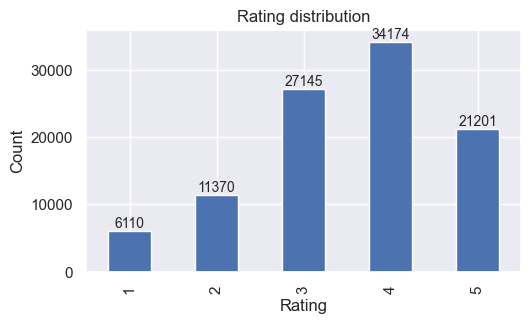

In [12]:
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(2, 2, 1)

counts = movie_ratings['rating'].value_counts().sort_index()
bars = counts.plot(kind='bar', ax=ax)

# Add labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(int(height)),
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.set_title("Rating distribution")
ax.set_xlabel("Rating")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


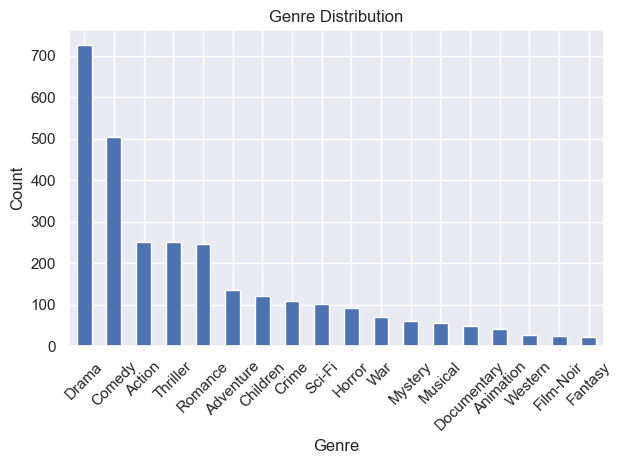

In [16]:
plt.subplot(1, 1, 1)
genre_columns = [
        'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
        'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
    ]

genre_count = movies[genre_columns].sum().sort_values(ascending=False)
genre_count.plot(kind='bar', rot=45)
plt.title("Genre Distribution")
plt.xlabel('Genre')
plt.ylabel('Count')

plt.tight_layout()
plt.show()